<a href="https://colab.research.google.com/github/SuyashSonawane/Fashion-MNIST/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [0]:
(ds_train,ds_test) ,info=tfds.load(name="fashion_mnist",with_info=True,shuffle_files=True,split=['train','test'],as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete7ORJW8/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete7ORJW8/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


1


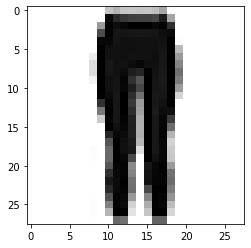

In [0]:
import matplotlib.pyplot as plt

for data in ds_train.take(1):
  image= data[0].numpy().squeeze()
  label= data[1].numpy()
  print(label)

  plt.imshow(image,cmap=plt.cm.binary)
  plt.show()


In [0]:
def normalize(image,label):
  return tf.cast(image,tf.float32)/255.0, label

ds_train = ds_train.map(normalize,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train=ds_train.cache()
ds_train=ds_train.shuffle(info.splits['train'].num_examples)
ds_train=ds_train.batch(128)
ds_train=ds_train.prefetch(tf.data.experimental.AUTOTUNE)


In [0]:
ds_test = ds_test.map(normalize,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test=ds_test.cache()
ds_test=ds_test.shuffle(info.splits['test'].num_examples)
ds_test=ds_test.batch(128)
ds_test=ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [0]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(8,(3,3),input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Conv2D(5,(3,3)),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(50,'relu'),
                           tf.keras.layers.Dense(10,'softmax')

])

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 5)         365       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 5)           0         
_________________________________________________________________
flatten (Flatten)            (None, 125)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                6300      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [0]:
history= model.fit(ds_train,epochs=100,validation_data=ds_test)

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.7732 - accuracy: 0.7297 - val_loss: 0.5777 - val_accuracy: 0.7923
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.5020 - accuracy: 0.8181 - val_loss: 0.5025 - val_accuracy: 0.8157
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4533 - accuracy: 0.8354 - val_loss: 0.4602 - val_accuracy: 0.8361
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4258 - accuracy: 0.8461 - val_loss: 0.4452 - val_accuracy: 0.8397
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4057 - accuracy: 0.8528 - val_loss: 0.4472 - val_accuracy: 0.8379
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3923 - accuracy: 0.8583 - val_loss: 0.4374 - val_accuracy: 0.8390
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3784 - accuracy: 0.8616 - val_loss: 0.4033 - val_accuracy: 0.8529

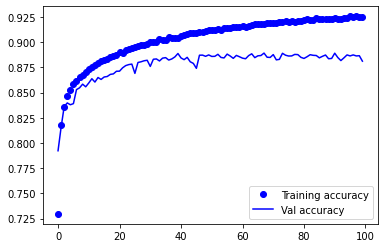

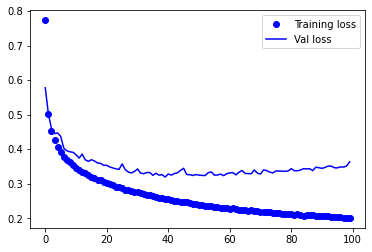

In [0]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Val accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Val loss')
plt.legend()

plt.show()


In [0]:
model.save("model.h5")

In [0]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 144.4MB 108kB/s 
     |████████████████████████████████| 256kB 37.4MB/s 
     |████████████████████████████████| 921kB 38.2MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=33bd1bb70c52e2703e3411af2801b69bfef72ac999ce1137214fa9f1fe70ada7
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation

In [0]:
!tensorflowjs_converter --input_format=keras /content/model.h5 /tmp/tfjs_model